In [1]:
# Avocados online sales data analysis

# Company partnered with Instacart for grocery delivery service to consumer
# Business requirement is to provide online sales for avocados
# The data analysis is performed across all the stores for all the consumers

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [3]:
# Importing the dataset into CVS file
# Creating a dataframe structure which is equal to table structure
# Show the number of rows and columns

avocados = pd.read_csv(r"C:\Users\hrap003\Desktop\Python\various projects\avocados.csv")
avocados.shape

(71887, 30)

In [4]:
# Next few steps consists of data cleaning and formatting
# This helps in effective and efficient data analysis

avocados = avocados.drop(["Unnamed: 0", "Consumer_Added_Notes_Txt", "Consumer_Replacement_Notes_Txt", "Row_Load_Ts", "Last_Update_Ts",
"Source_System_Id", "Source_Key_Txt", "Orig_Price_Mltpl_Wgt_Amt", "Orig_Price_Mltpl_Amt", "Alcohol_Item_Flg", "Ecom_Item_Check_Digit_Num", "Ecom_Item_Cd", 'Orig_Price_Mltpl_Qty', 'Ecom_Price_Mltpl_Qty', 'Ecom_Est_Net_Sales_Amt', 'Ecom_Price_Mltpl_Wgt_Amt',
'Ecom_Price_Mltpl_Amt', 'Ecom_Order_Line_Seq_Num', "Ecom_Item_Local_Scan_Cd"], axis = 1)

In [5]:
# Converting columns names to lower case/small letters
# To maintain consistency
# Ease of access

def clean_columns(columns):
    return columns.lower()
avocados.columns = [clean_columns(cols) for cols in avocados.columns]

In [6]:
# Renaming column names
# Ease of access
# shorter column names

avocados.rename(columns={'product_level_01_desc':'department', 'product_level_07_desc': 'product_desc'}, inplace=True)

In [7]:
# Convert column datatypes for efficient data analysis
# Convert ecom_order_id from object/string datatype to integer
# Convert org_id from object/string datatype to integer
# Convert product_id from object/string datatype to integer


avocados["ecom_order_id"] = avocados["ecom_order_id"].str.replace(",", "").astype(int)
avocados["org_id"] = avocados["org_id"].str.replace(",", "").astype(int)
avocados["product_id"] = avocados["product_id"].str.replace(",", "")

In [8]:
# Create a new column by mapping an exisiting column
# Mapping a column is useful for data analysis and behaviour

map_ecom_price_type_desc = {1 : "retailer_promotion",
                            2 : "standard",
                            3 : "sale"}

avocados["ecom_price_type_desc"] = avocados["ecom_price_type_id"].map(map_ecom_price_type_desc)

In [9]:
# Reorder column names for ease of use

avocados = avocados[["ecom_order_id", "ecom_order_dt", "org_id", "product_id", "product_desc", "department", "ecom_order_qty", "ecom_order_wgt_amt", "ecom_price_type_id", "ecom_price_type_desc", "ecom_net_sales_amt", "consumer_paid_amt"]]

In [10]:
# Provides information about the dataframe

avocados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71887 entries, 0 to 71886
Data columns (total 12 columns):
ecom_order_id           71887 non-null int32
ecom_order_dt           71887 non-null object
org_id                  71887 non-null int32
product_id              71887 non-null object
product_desc            71887 non-null object
department              71887 non-null object
ecom_order_qty          71887 non-null int64
ecom_order_wgt_amt      71887 non-null float64
ecom_price_type_id      71887 non-null int64
ecom_price_type_desc    71887 non-null object
ecom_net_sales_amt      71887 non-null float64
consumer_paid_amt       71887 non-null float64
dtypes: float64(3), int32(2), int64(2), object(5)
memory usage: 6.0+ MB


In [11]:
# Convert column data/values to lower case/small letters
# Maintains consistency
# Ease of use for data analysis

avocados["department"] = avocados["department"].str.lower()
avocados["product_desc"] = avocados["product_desc"].str.lower()

In [12]:
# Split ecom_order_date column into multiple columns
# First split - split ecom_order_dt to year and add a new column to the data set
# Second split - split ecom_order_dt to month and add a new column to the data set
# Third split - split ecom_order_dt to day and add a new column to the data set
# This split helps to analyze data at year, month and day grain


avocados["ecom_order_year"] = avocados["ecom_order_dt"].str.split("/", expand = True)[2]
avocados["ecom_order_year"] = avocados["ecom_order_year"].astype(int)

avocados["ecom_order_month"] = avocados["ecom_order_dt"].str.split("/", expand = True)[0]
avocados["ecom_order_month"] = avocados["ecom_order_month"].astype(int)

avocados["ecom_order_day"] = avocados["ecom_order_dt"].str.split("/", expand = True)[1]
avocados["ecom_order_day"] = avocados["ecom_order_day"].astype(int)

In [13]:
# Adding a new column
# This column is an optional column
# converted ecom_order_dt column from object/string data type to datetime datatype

avocados["date"] = pd.to_datetime(avocados["ecom_order_dt"])

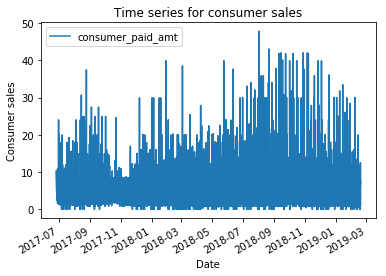

In [14]:
# Creating a new dataframe
# Setting the date column as the index for the dataframe
# Converting consumer paid amt column datatype to numeric
# The reason for creating a new dataframe, it is always adviced to create a copy of the original data set
# By creating new daatframe, we retain the orginial dataset/dataframe in its orginial form
# Any new dataframe created for analysis can always be deleted at any given time


data = avocados.loc[:, ["consumer_paid_amt"]]
data = data.set_index(avocados["date"])
data["consumer_paid_amt"] = pd.to_numeric(data["consumer_paid_amt"], downcast='float', errors="coerce")
ax1 = data.plot()
ax1.set_xlabel("Date")
ax1.set_ylabel("Consumer sales")
ax1.set_title("Time series for consumer sales")

plt.show()

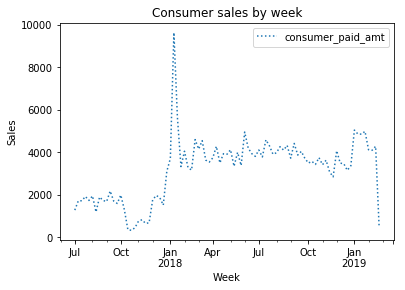

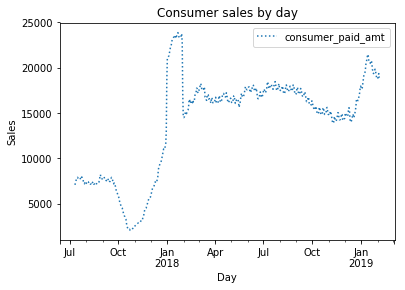

In [15]:
# Creating a basic time series plot
# This visualization represents the amount paid by consumers, in other words, the total number of sales
# The first plot represents the sales by week for the entire dataset
# The second plot respresents the sales by day for the entire dataset
# Both the plots provide an overview/high level insight on total sales

ax1 = data.resample('W').sum().plot(style=[':', '--', '-'])
ax1.set_xlabel("Week")
ax1.set_ylabel("Sales")
ax1.set_title("Consumer sales by week")

ax2 = data.resample('D').sum().rolling(30, center=True).sum().plot(style=[':', '--', '-'])
ax2.set_xlabel("Day")
ax2.set_ylabel("Sales")
ax2.set_title("Consumer sales by day")

plt.show()

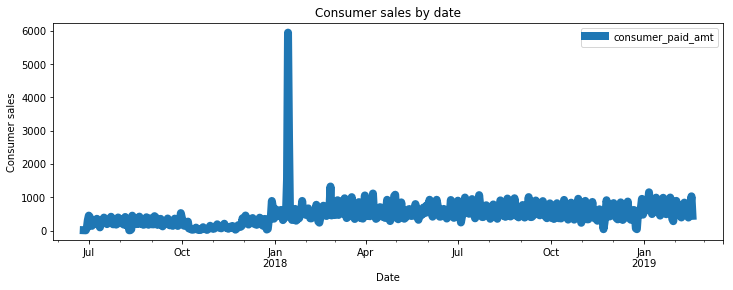

In [16]:
# Create a visualization to repersent the sales by date

avocados_date = pd.DataFrame(data.groupby("date")["consumer_paid_amt"].sum().reset_index())
ax1 = avocados_date.plot.line(x = "date", y = "consumer_paid_amt", figsize=(12, 4), linewidth=8, fontsize=10)
ax1.set_xlabel("Date")
ax1.set_ylabel("Consumer sales")
ax1.set_title("Consumer sales by date")
plt.show()

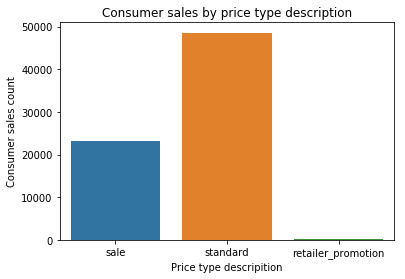

In [17]:
# Create a visualization to represent the total sales by price type description
# This plot provides an insight on discounts, promotions, standard sales

ax1 = sns.countplot(avocados["ecom_price_type_desc"])
ax1.set_xlabel("Price type descripition")
ax1.set_ylabel("Consumer sales count")
ax1.set_title("Consumer sales by price type description")

plt.show()

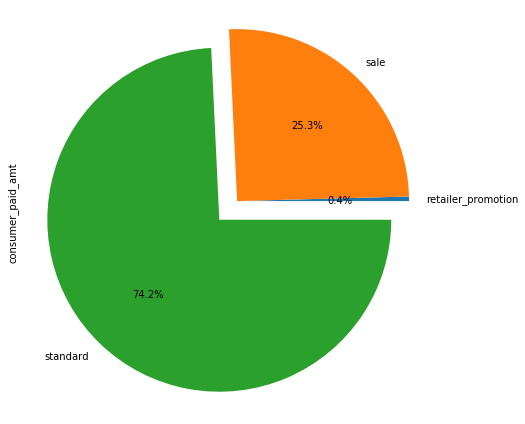

In [18]:
# Create a visualization to represent the total sales by price type description
# This plot and the above plot repesents the same features from the dataset
# The main difference, the pie chart provides an insight based on percentage
# The above plot/chart provides an insight based on counts

ax1 = avocados.groupby("ecom_price_type_desc")["consumer_paid_amt"].sum().plot.pie(figsize=(7, 6), explode=(0, 0, 0.15), autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()
plt.show()


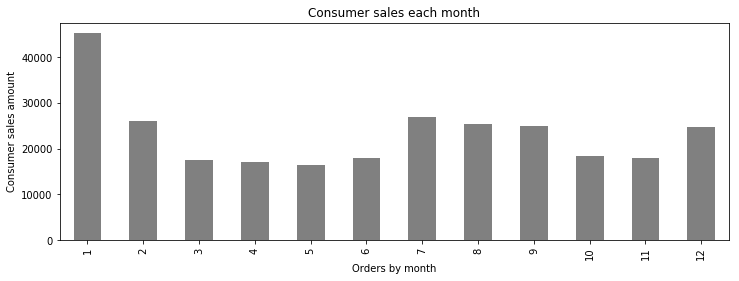

In [19]:
# Create a visualization to represent the total sales by each month

ax1 = avocados.groupby("ecom_order_month")["consumer_paid_amt"].sum().plot.bar(figsize=(12, 4), color = "grey")
ax1.set_xlabel("Orders by month")
ax1.set_ylabel("Consumer sales amount")
ax1.set_title("Consumer sales each month")

plt.show()

In [20]:
# Create a dataframe for each year

avocados_year_2018 = avocados[(avocados["ecom_order_year"] == 2018)]
avocados_year_2019 = avocados[(avocados["ecom_order_year"] == 2019)]

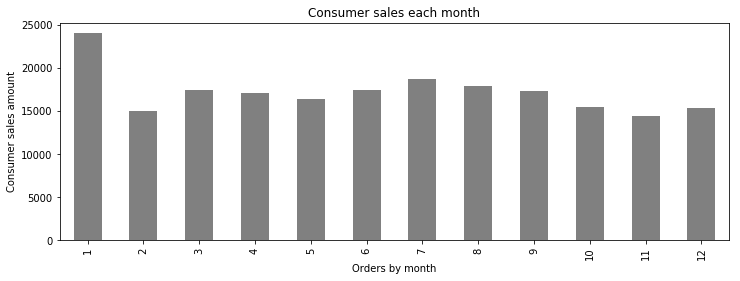

In [21]:
# Create a visualization to represents the sales by each month for the year 2018

ax1 = avocados_year_2018.groupby("ecom_order_month")["consumer_paid_amt"].sum().plot.bar(figsize=(12, 4), color = "grey")
ax1.set_xlabel("Orders by month")
ax1.set_ylabel("Consumer sales amount")
ax1.set_title("Consumer sales each month")

plt.show()


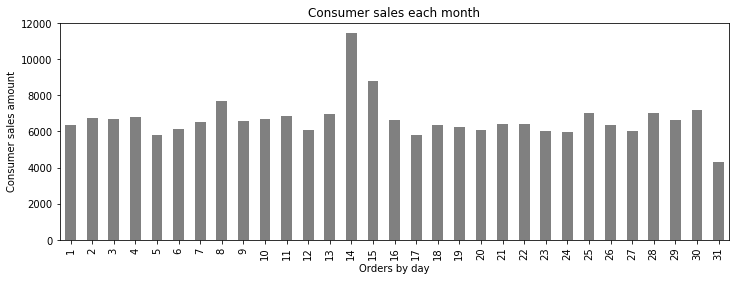

In [22]:
# Create a visulaization to represents the sales by each day for the year 2018

ax1 = avocados_year_2018.groupby("ecom_order_day")["consumer_paid_amt"].sum().plot.bar(figsize=(12, 4), color = "grey")
ax1.set_xlabel("Orders by day")
ax1.set_ylabel("Consumer sales amount")
ax1.set_title("Consumer sales each month")

plt.show()

In [23]:
# Create new dataframe
# As mentioned earlier, creating different dataframes is an individual/personal choice
# Varous data analysis can be performed from a single dataframe or from multiple dataframe


avocados_daily = avocados.copy()
avocados_daily["ecom_order_dt"] = pd.to_datetime(avocados_daily["ecom_order_dt"])
avocados_daily = avocados_daily.set_index("ecom_order_dt")

In [24]:
# Create new columns
# Creating a year column from ecom_order_date index
# Creating a month column from ecom_order_date index
# Creating a week column from ecom_order)date index

avocados_daily['Year'] = avocados_daily.index.year
avocados_daily['Month'] = avocados_daily.index.month
avocados_daily['Weekday'] = avocados_daily.index.weekday_name

avocados_daily.sample(5, random_state=0)

,ecom_order_id,org_id,product_id,product_desc,department,ecom_order_qty,ecom_order_wgt_amt,ecom_price_type_id,ecom_price_type_desc,ecom_net_sales_amt,consumer_paid_amt,ecom_order_year,ecom_order_month,ecom_order_day,date,Year,Month,Weekday
ecom_order_dt,,,,,,,,,,,,,,,,,,
2018-10-16,176874,36060,542,avocados,produce,1,0.0,2,standard,2.00,2.00,2018,10,16,2018-10-16,2018,10,Tuesday
2019-02-15,715795,23,542,avocados,produce,2,0.0,2,standard,3.34,3.34,2019,2,15,2019-02-15,2019,2,Friday
2018-11-26,239254,117,697,avocados,produce,1,0.0,2,standard,1.99,1.99,2018,11,26,2018-11-26,2018,11,Monday
2018-07-13,36184,122,697,avocados,produce,2,0.0,2,standard,3.98,3.98,2018,7,13,2018-07-13,2018,7,Friday
2018-09-07,117167,1010725,697,avocados,produce,1,0.0,2,standard,0.79,0.79,2018,9,7,2018-09-07,2018,9,Friday


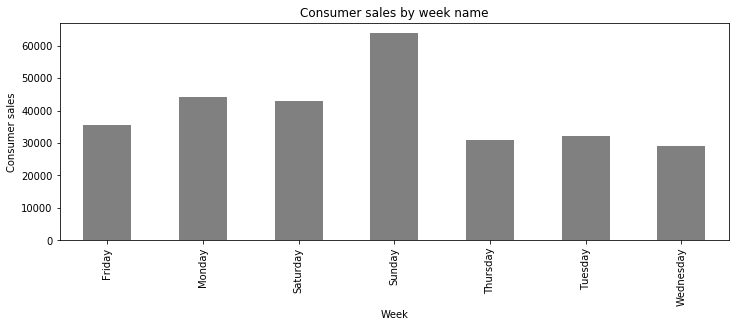

In [25]:
# Create a visualization to represents the total sales by week for the entire dataset

ax1 = avocados_daily.groupby("Weekday")["consumer_paid_amt"].sum().plot.bar(figsize=(12, 4), color = "grey")
ax1.set_xlabel("Week")
ax1.set_ylabel("Consumer sales")
ax1.set_title("Consumer sales by week name")
plt.show()

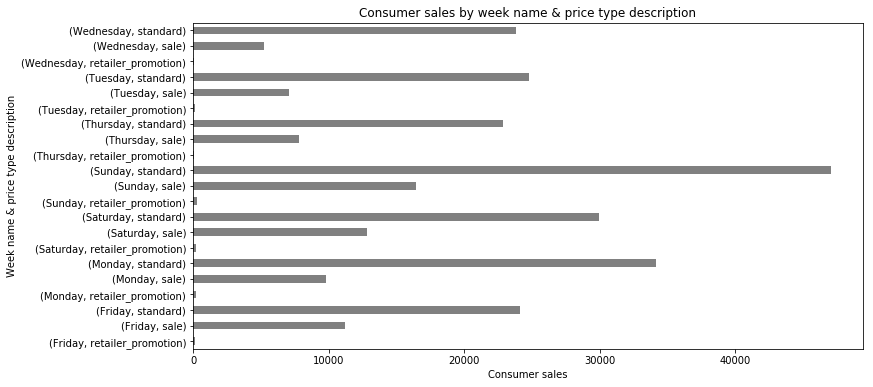

In [26]:
# Create a visualization to represents the total sales by price type description at a week level
# This plot provides an insight on the kind of sales and the discounts, promotions and sales at week level

ax1 = avocados_daily.groupby(["Weekday", "ecom_price_type_desc"])["consumer_paid_amt"].sum().plot.barh(figsize=(12, 6), color = "grey")
ax1.set_xlabel("Consumer sales")
ax1.set_ylabel("Week name & price type description")
ax1.set_title("Consumer sales by week name & price type description")

plt.show()

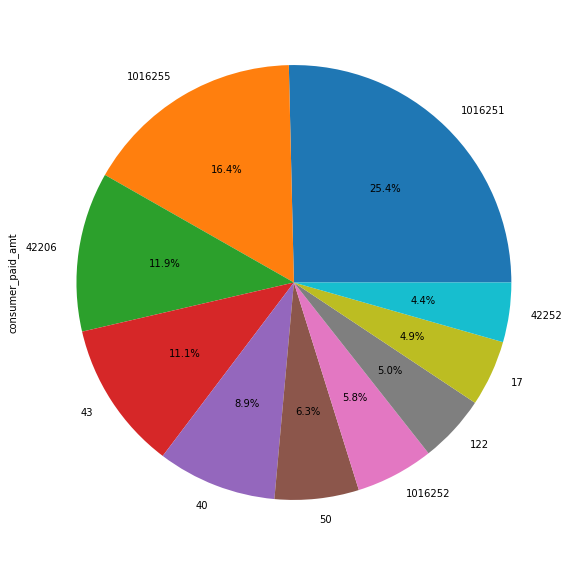

,org_id,consumer_paid_amt
0,1016251,28881.08
1,1016255,18658.12
2,42206,13507.63
3,43,12595.07
4,40,10100.66
5,50,7123.63
6,1016252,6598.62
7,122,5742.80
8,17,5587.65
9,42252,5034.27


In [27]:
# Create visualization to represents sales by each store
# Since there are many stores, this plot repesents the top 10 stores

avocados.groupby("org_id")["consumer_paid_amt"].sum(normalize=True).sort_values(ascending=False).head(10).plot.pie(figsize=(10, 10), autopct='%1.1f%%')
plt.show()

pd.DataFrame(avocados.groupby("org_id")["consumer_paid_amt"].sum(normalize=True).sort_values(ascending=False).head(10)).reset_index()


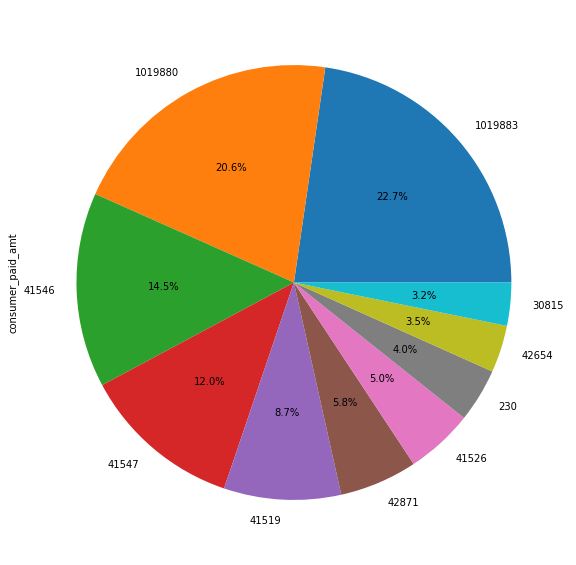

,org_id,consumer_paid_amt
0,1019883,23.13
1,1019880,21.04
2,41546,14.77
3,41547,12.20
4,41519,8.87
5,42871,5.90
6,41526,5.11
7,230,4.07
8,42654,3.58
9,30815,3.26


In [28]:
# Create visualization to represents sales by each store
# Since there are many stores, this plot repesents the bottom 10 stores

avocados.groupby("org_id")["consumer_paid_amt"].sum().sort_values(ascending=False).tail(10).plot.pie(figsize=(10, 10), autopct='%1.1f%%')
plt.show()
pd.DataFrame(avocados.groupby("org_id")["consumer_paid_amt"].sum().sort_values(ascending=False).tail(10)).reset_index()

In [29]:
# Create a dataframe which represents the data with differences between prices
# The orginal dataset has 2 columns
# ecom_net_sales_amt: This column represents the amount per product/item shown on website
# consumer_paid_amt: This column represents the amount paid by consumer per product/item on website

avocados_price_difference = avocados[(avocados["ecom_net_sales_amt"]) < (avocados["consumer_paid_amt"])]

In [30]:
# Create a dataframe which represents the data with prices match
# The orginal dataset has 2 columns
# ecom_net_sales_amt: This column represents the amount per product/item shown on website
# consumer_paid_amt: This column represents the amount paid by consumer per product/item on website

avocados_price_match = avocados[(avocados["ecom_net_sales_amt"]) == (avocados["consumer_paid_amt"])]

In [31]:
# Total number of rows and columns when the price differs

avocados_price_difference.shape

(9139, 16)

In [32]:
# Total number of rows and columns when the price match

avocados_price_match.shape

(62748, 16)

In [33]:
# The dataframe represents the price difference
# The dataframe represents the price difference for each month
# The dataframe represents the total price difference in terms of percentage

avocados_price_diff = pd.DataFrame(avocados_price_difference.groupby('ecom_order_month')["ecom_net_sales_amt", "consumer_paid_amt"].sum().reset_index())
avocados_price_diff["amount_diff_in_percent"] = ((avocados_price_diff["consumer_paid_amt"] - avocados_price_diff["ecom_net_sales_amt"])/avocados_price_diff["ecom_net_sales_amt"]) * 100
avocados_price_diff["amount_diff_in_percent"] = round(avocados_price_diff["amount_diff_in_percent"], 2)
avocados_price_diff

,ecom_order_month,ecom_net_sales_amt,consumer_paid_amt,amount_diff_in_percent
0,1,4911.96,5096.86,3.76
1,2,3027.99,3147.86,3.96
2,3,2773.17,2884.88,4.03
3,4,2076.22,2180.48,5.02
4,5,2071.33,2167.61,4.65
5,6,2736.88,2872.68,4.96
6,7,3737.48,3906.67,4.53
7,8,3251.74,3398.89,4.53
8,9,3126.71,3266.78,4.48
9,10,2072.57,2160.89,4.26


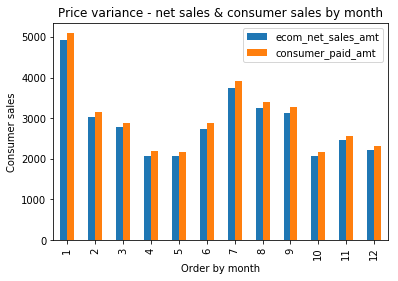

In [34]:


ax1 = avocados_price_difference.groupby('ecom_order_month')["ecom_net_sales_amt", "consumer_paid_amt"].sum().plot.bar()
ax1.set_xlabel("Order by month")
ax1.set_ylabel("Consumer sales")
ax1.set_title("Price variance - net sales & consumer sales by month")

plt.show()

In [35]:
# Create a rolling dataset
# Rolling dataset is a timeseries visualization at day, week and year grain

avocados_daily_day = avocados_daily["consumer_paid_amt"].rolling(30, center=True).mean()
avocados_daily_week = avocados_daily["consumer_paid_amt"].rolling(7, center=True).mean()
avocados_daily_year = avocados_daily["consumer_paid_amt"].rolling(window=365, center=True, min_periods=360).mean()

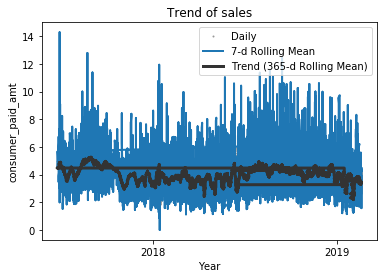

In [36]:
# Create a visualization to represents daily, 7-day rolling mean, and 365-day rolling mean time series
# The time series plot provides a trend

fig, ax = plt.subplots()

ax.plot(avocados_daily_day, marker='.', markersize=2, color='0.6',
        linestyle='None', label='Daily')

ax.plot(avocados_daily_week, linewidth=2, label='7-d Rolling Mean')

ax.plot(avocados_daily_year, color='0.2', linewidth=3,
        label='Trend (365-d Rolling Mean)')

# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('consumer_paid_amt')
ax.set_title('Trend of sales');